In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
import sklearn.linear_model
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import imageio
import PIL
from sklearn.model_selection import train_test_split
import torch
from itertools import product

In [ ]:
data_new = pandas.read_pickle("./pickeddata.pkl")
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,summer
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,autumn
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,autumn
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,autumn


In [ ]:
season = {'spring': 0, 'summer': 1, 'autumn':2, 'winter': 3}
data_new.Season = [season[i] for i in data_new.Season]
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,2
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,2
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,2
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,2
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,3
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,1
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,2
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,2
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,2


In [ ]:
XY=data_new[['Date for US Imports and Exports','Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)','Season','Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']].dropna(axis='index')
(feature1,featurename1)=('Date for US Imports and Exports',"Year")
(feature2,featurescale,featurename2)=('Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)',1000,"Exports")
(feature3,featurename3)=('Season','Season')
(label,labelname)=('Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',"Prices (Dollars per Gallon)")

#XY[feature2]=XY[feature2]/1000
XY.columns=[featurename1,featurename2,featurename3,labelname]
XY[featurename1]=pandas.to_datetime(XY[featurename1]).dt.year

print(XY)

X=XY[[featurename1,featurename2,featurename3]].squeeze()
Y=XY[labelname].squeeze()
print(X)
print(Y)

      Year  Exports  Season  Prices (Dollars per Gallon)
0     2001    10772       2                        1.224
1     2001    10243       2                        1.208
2     2001     9576       2                        1.168
3     2001    11170       2                        1.149
4     2001     9885       3                        1.136
...    ...      ...     ...                          ...
1137  2023    -1684       1                        3.931
1138  2023    -2593       2                        3.925
1139  2023      431       2                        3.941
1140  2023    -2290       2                        4.001
1141  2023    -1706       2                        3.963

[1142 rows x 4 columns]
      Year  Exports  Season
0     2001    10772       2
1     2001    10243       2
2     2001     9576       2
3     2001    11170       2
4     2001     9885       3
...    ...      ...     ...
1137  2023    -1684       1
1138  2023    -2593       2
1139  2023      431       2
1140  2023 

In [ ]:
X = X.values
Y = Y.values

In [ ]:
# Split the data
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)    # change traning, testing, validating parameter
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
#for mini-batch training
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class Build_Data(Dataset):
    # Constructor
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Creating DataLoader object
dataset = Build_Data(x_train_tensor,y_train_tensor)
#train_loader = DataLoader(dataset=dataset, batch_size=799)

**Optimizer Comparison and Hyperparameter Tuning**

Comparing between 3 and 4 layers with neuron of 4,8,16,32

In [ ]:
class pricePredictor_3layer(torch.nn.Module):
    def __init__(self,l1,l2):
        super(pricePredictor_3layer, self).__init__()
        self.fc1 = torch.nn.Linear(3, l1)
        self.fc2 = torch.nn.Linear(l1, l2)
        self.fc3 = torch.nn.Linear(l2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class pricePredictor_4layer(torch.nn.Module):
    def __init__(self,l1,l2,l3):
        super(pricePredictor_4layer, self).__init__()
        self.fc1 = torch.nn.Linear(3, l1)
        self.fc2 = torch.nn.Linear(l1, l2)
        self.fc3 = torch.nn.Linear(l2, l3)
        self.fc4 = torch.nn.Linear(l3, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
def main_model_training(param_m,lr_val,layer,batch_s,epoch,optimizer_select):
    model=None
    train_loader=None
    optimizer=None
    if layer==4:
      model=pricePredictor_4layer(param_m[0],param_m[1],param_m[2])
    else:
      model=pricePredictor_3layer(param_m[0],param_m[1])
    Loss = torch.nn.MSELoss()

    #if batch_s==float('inf'):
      #train_loader = DataLoader(dataset=dataset)
    if batch_s!=float('inf'):
      train_loader = DataLoader(dataset=dataset, batch_size=batch_s)
    if optimizer_select=='Adam':
      optimizer = torch.optim.Adam(model.parameters(), lr=lr_val)
    elif optimizer_select=='SGD':
      optimizer = torch.optim.SGD(model.parameters(), lr=lr_val)
    elif optimizer_select=='RMSprop':
      optimizer = torch.optim.RMSprop(model.parameters(), lr=lr_val)

    train_losses = []
    val_losses = []
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
    model.to(device)
    num_epochs = epoch
    for epoch in range(num_epochs):
        if batch_s!=float('inf'):
            for x, y in train_loader:
              # Train
              #print('x',x.shape)
              #print('y',y.shape)
              model.train()
              optimizer.zero_grad()
              outputs = model(x.to(device))
              loss = Loss(outputs.to(device), y.to(device))
              loss.backward()
              optimizer.step()
              train_losses.append(loss.item())
        else:
            #print('x',x_train_tensor.shape)
            #print('y',y.shape)
            model.train()
            optimizer.zero_grad()
            #x_train_tensor,y_train_tensor
            outputs = model(x_train_tensor.to(device))
            loss = Loss(outputs, y_train_tensor.to(device))
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        # Validate
        model.eval()
        val_outputs = model(x_val_tensor.to(device))
        val_loss = Loss(val_outputs, y_val_tensor.to(device))
        val_losses.append(val_loss.item())

        if epoch % 10 == 0:
          print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")
    return model,train_losses,val_losses

In [ ]:
def train_model_layer(param_m,lr_val,layer,batch_s,epoch_num,optimizer_select):
    dict_param={}
    for i in range(len(param_m)):
        save_loss={}
        dict_loss={}
        for j in range(len(lr_val)):
            _,train_losses,val_losses=main_model_training(param_m[i],lr_val[j],layer,batch_s,epoch_num,optimizer_select)
            save_loss[j]=val_losses[-1]
        min_key = min(save_loss, key=save_loss.get)
        min_value = save_loss[min_key]
        dict_loss[min_key]=min_value
        dict_param[i]=dict_loss
    return dict_param

In [ ]:
def find_min(data):
  min_value = float('inf')
  min_key = None

  for key, inner_dict in data.items():
      for inner_key, value in inner_dict.items():
          if value < min_value:
              min_value = value
              min_key = key
  return min_key

In [ ]:
lr_set=[0.00001,0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
# Define the set of numbers
node_no = [4,8,16,32]
perms_3layer = product(node_no, repeat=2)
perms_3layer_list = list(perms_3layer)
print(perms_3layer_list)
perms_4layer = product(node_no, repeat=3)
perms_4layer_list = list(perms_4layer)
print(perms_4layer_list)

[(4, 4), (4, 8), (4, 16), (4, 32), (8, 4), (8, 8), (8, 16), (8, 32), (16, 4), (16, 8), (16, 16), (16, 32), (32, 4), (32, 8), (32, 16), (32, 32)]
[(4, 4, 4), (4, 4, 8), (4, 4, 16), (4, 4, 32), (4, 8, 4), (4, 8, 8), (4, 8, 16), (4, 8, 32), (4, 16, 4), (4, 16, 8), (4, 16, 16), (4, 16, 32), (4, 32, 4), (4, 32, 8), (4, 32, 16), (4, 32, 32), (8, 4, 4), (8, 4, 8), (8, 4, 16), (8, 4, 32), (8, 8, 4), (8, 8, 8), (8, 8, 16), (8, 8, 32), (8, 16, 4), (8, 16, 8), (8, 16, 16), (8, 16, 32), (8, 32, 4), (8, 32, 8), (8, 32, 16), (8, 32, 32), (16, 4, 4), (16, 4, 8), (16, 4, 16), (16, 4, 32), (16, 8, 4), (16, 8, 8), (16, 8, 16), (16, 8, 32), (16, 16, 4), (16, 16, 8), (16, 16, 16), (16, 16, 32), (16, 32, 4), (16, 32, 8), (16, 32, 16), (16, 32, 32), (32, 4, 4), (32, 4, 8), (32, 4, 16), (32, 4, 32), (32, 8, 4), (32, 8, 8), (32, 8, 16), (32, 8, 32), (32, 16, 4), (32, 16, 8), (32, 16, 16), (32, 16, 32), (32, 32, 4), (32, 32, 8), (32, 32, 16), (32, 32, 32)]


SGD

In [ ]:
#3layers with sgd
performance_sgd3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'SGD')

best_case_3layer_sgd=find_min(performance_sgd3)
print('best_case_3layer_sgd',best_case_3layer_sgd)
best_param_3layer_sgd=perms_3layer_list[best_case_3layer_sgd]
print('best_param_3layer_sgd',best_param_3layer_sgd)
best_lr_3layer_sgd_idx=list(performance_sgd3[best_case_3layer_sgd].keys())[0]
best_lr_3layer_sgd=lr_set[best_lr_3layer_sgd_idx]
print('best_lr_3layer_sgd',best_lr_3layer_sgd)
best_loss_3layer_sgd=performance_sgd3[best_case_3layer_sgd][best_lr_3layer_sgd_idx]
print('best_loss_3layer_sgd',best_loss_3layer_sgd)

#(4, 32)
#0.007
#best_loss_3layer_sgd=0.527089536190033

In [ ]:
#4layers with sgd
performance_sgd4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'SGD')
best_case_4layer_sgd=find_min(performance_sgd4)
print('best_case_4layer_sgd',best_case_4layer_sgd)
best_param_4layer_sgd=perms_4layer_list[best_case_4layer_sgd]
print('best_param_4layer_sgd',best_param_4layer_sgd)
best_lr_4layer_sgd_idx=list(performance_sgd4[best_case_4layer_sgd].keys())[0]
best_lr_4layer_sgd=lr_set[best_lr_4layer_sgd_idx]
print('best_lr_4layer_sgd',best_lr_4layer_sgd)
best_loss_4layer_sgd=performance_sgd4[best_case_4layer_sgd][best_lr_4layer_sgd_idx]
print('best_loss_4layer_sgd',best_loss_4layer_sgd)

#(8, 4, 8)
#3e-05
#best_loss_4layer_sgd=0.42001083493232727

Adam

In [ ]:
#3layers with adam
performance_adam3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'Adam')
best_case_3layer_adam=find_min(performance_adam3)
print('best_case_3layer_adam',best_case_3layer_adam)
best_param_3layer_adam=perms_3layer_list[best_case_3layer_adam]
print('best_param_3layer_adam',best_param_3layer_adam)
best_lr_3layer_adam_idx=list(performance_adam3[best_case_3layer_adam].keys())[0]
best_lr_3layer_adam=lr_set[best_lr_3layer_adam_idx]
print('best_lr_3layer_adam',best_lr_3layer_adam)
best_loss_3layer_adam=performance_adam3[best_case_3layer_adam][best_lr_3layer_adam_idx]
print('best_loss_3layer_adam',best_loss_3layer_adam)

#(4, 16)
#0.0007
#best_loss_3layer_adam=0.41511964797973633

In [ ]:
#4layers with adam
performance_adam4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'Adam')
best_case_4layer_adam=find_min(performance_adam4)
print('best_case_4layer_adam',best_case_4layer_adam)
best_param_4layer_adam=perms_4layer_list[best_case_4layer_adam]
print('best_param_4layer_adam',best_param_4layer_adam)
best_lr_4layer_adam_idx=list(performance_adam4[best_case_4layer_adam].keys())[0]
best_lr_4layer_adam=lr_set[best_lr_4layer_adam_idx]
print('best_lr_4layer_adam',best_lr_4layer_adam)
best_loss_4layer_adam=performance_adam4[best_case_4layer_adam][best_lr_4layer_adam_idx]
print('best_loss_4layer_adam',best_loss_4layer_adam)

#(8, 8, 32)
#0.0006
#best_loss_4layer_adam=0.3635537624359131

RMS

In [ ]:
#3layers with RMSprop
performance_rms3=train_model_layer(perms_3layer_list,lr_set,3,128,300,'RMSprop')
best_case_3layer_rms=find_min(performance_rms3)
print('best_case_3layer_rms',best_case_3layer_rms)
best_param_3layer_rms=perms_3layer_list[best_case_3layer_rms]
print('best_param_3layer_rms',best_param_3layer_rms)
best_lr_3layer_rms_idx=list(performance_rms3[best_case_3layer_rms].keys())[0]
best_lr_3layer_rms=lr_set[best_lr_3layer_rms_idx]
print('best_lr_3layer_rms',best_lr_3layer_rms)
best_loss_3layer_rms=performance_rms3[best_case_3layer_rms][best_lr_3layer_rms_idx]
print('best_loss_3layer_rms',best_loss_3layer_rms)

#(4, 16)
#0.001
#best_loss_3layer_rms=0.4022960662841797

In [ ]:
#4layers with RMSprop
performance_rms4=train_model_layer(perms_4layer_list,lr_set,4,128,300,'RMSprop')
best_case_4layer_rms=find_min(performance_rms4)
print('best_case_4layer_rms',best_case_4layer_rms)
best_param_4layer_rms=perms_4layer_list[best_case_4layer_rms]
print('best_param_4layer_rms',best_param_4layer_rms)
best_lr_4layer_rms_idx=list(performance_rms4[best_case_4layer_rms].keys())[0]
best_lr_4layer_rms=lr_set[best_lr_4layer_rms_idx]
print('best_lr_4layer_rms',best_lr_4layer_rms)
best_loss_4layer_rms=performance_rms4[best_case_4layer_rms][best_lr_4layer_rms_idx]
print('best_loss_4layer_rms',best_loss_4layer_rms)

#(16, 8, 16)
#0.002
#best_loss_4layer_rms=0.3673398196697235

The best model is

best_param=[8,8,32] \
best_lr=0.0006 \
best_no_layer=4 \
with Adam optimizer


**Effect of Mini-batch**

In [ ]:
best_param=[8,8,32]
best_lr=0.0006
best_no_layer=4

Epoch 1/100, Training Loss: 267.9388122558594, Validation Loss: 212.73606872558594
Epoch 11/100, Training Loss: 1.4987983703613281, Validation Loss: 1.0845834016799927
Epoch 21/100, Training Loss: 0.8707206845283508, Validation Loss: 0.7965258359909058
Epoch 31/100, Training Loss: 0.7652230262756348, Validation Loss: 0.6867212653160095
Epoch 41/100, Training Loss: 0.6988486647605896, Validation Loss: 0.6298123002052307
Epoch 51/100, Training Loss: 0.6540562510490417, Validation Loss: 0.6053341627120972
Epoch 61/100, Training Loss: 0.6176795363426208, Validation Loss: 0.5865697860717773
Epoch 71/100, Training Loss: 0.5897012948989868, Validation Loss: 0.5433541536331177
Epoch 81/100, Training Loss: 0.5759813785552979, Validation Loss: 0.5253798365592957
Epoch 91/100, Training Loss: 0.5522157549858093, Validation Loss: 0.5345312356948853
Epoch 1/100, Training Loss: 6.193942070007324, Validation Loss: 12.87503719329834
Epoch 11/100, Training Loss: 0.4951958954334259, Validation Loss: 0.58

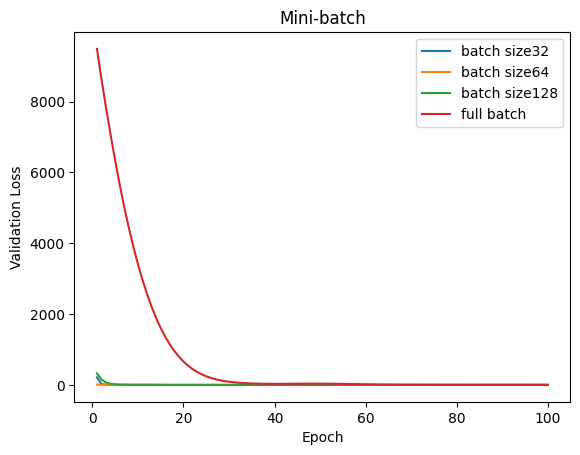

In [ ]:
batch_search_space=[32,64,128,float('inf')] #0
#let float('inf') represents full batch
batch_search_hist=[]
for batch_s in batch_search_space:
  #b_search_data.append[batch_s]
  _,train_losses,val_losses=main_model_training(best_param,best_lr,best_no_layer,batch_s,100,'Adam')
  if batch_s==float('inf'):
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='full batch')
  else:
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='batch size'+str(batch_s))
  #batch_search_hist.append([batch_s,train_losses,val_losses])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Mini-batch')
plt.legend()
plt.show()

Epoch 1/300, Training Loss: 2657.676513671875, Validation Loss: 2626.610107421875
Epoch 11/300, Training Loss: 2.6654345989227295, Validation Loss: 2.7568302154541016
Epoch 21/300, Training Loss: 0.5055002570152283, Validation Loss: 0.48697948455810547
Epoch 31/300, Training Loss: 0.45494651794433594, Validation Loss: 0.4098872244358063
Epoch 41/300, Training Loss: 0.46216461062431335, Validation Loss: 0.39838743209838867
Epoch 51/300, Training Loss: 0.46526962518692017, Validation Loss: 0.3948948383331299
Epoch 61/300, Training Loss: 0.4628741443157196, Validation Loss: 0.39501890540122986
Epoch 71/300, Training Loss: 0.46114036440849304, Validation Loss: 0.3950789272785187
Epoch 81/300, Training Loss: 0.4647098183631897, Validation Loss: 0.3953140377998352
Epoch 91/300, Training Loss: 0.468939870595932, Validation Loss: 0.3977392613887787
Epoch 101/300, Training Loss: 0.4662245512008667, Validation Loss: 0.39644086360931396
Epoch 111/300, Training Loss: 0.46856680512428284, Validatio

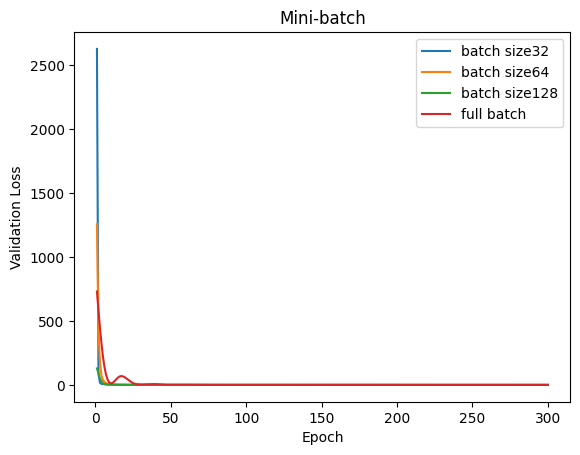

In [ ]:
batch_search_space=[32,64,128,float('inf')] #0
#let float('inf') represents full batch
batch_search_hist=[]
for batch_s in batch_search_space:
  #b_search_data.append[batch_s]
  _,train_losses,val_losses=main_model_training(best_param,best_lr,best_no_layer,batch_s,300,'Adam')
  if batch_s==float('inf'):
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='full batch')
  else:
    plt.plot(list(range(1, len(val_losses) + 1)), val_losses, label='batch size'+str(batch_s))
  #batch_search_hist.append([batch_s,train_losses,val_losses])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Mini-batch')
plt.legend()
plt.show()

Mini-batch provides much faster convergence.

**Testing**

In [ ]:
model_final,train_losses,val_losses=main_model_training(best_param,best_lr,best_no_layer,128,500,'Adam')

Epoch 1/500, Training Loss: 4146.45166015625, Validation Loss: 4088.853759765625
Epoch 11/500, Training Loss: 2.184990644454956, Validation Loss: 2.2397289276123047
Epoch 21/500, Training Loss: 1.1847925186157227, Validation Loss: 1.432897925376892
Epoch 31/500, Training Loss: 0.9920303821563721, Validation Loss: 1.1748311519622803
Epoch 41/500, Training Loss: 0.8969025015830994, Validation Loss: 1.0408380031585693
Epoch 51/500, Training Loss: 0.8475087285041809, Validation Loss: 0.979087769985199
Epoch 61/500, Training Loss: 0.817603349685669, Validation Loss: 0.9439857006072998
Epoch 71/500, Training Loss: 0.796252965927124, Validation Loss: 0.9183847308158875
Epoch 81/500, Training Loss: 0.7779398560523987, Validation Loss: 0.8957890868186951
Epoch 91/500, Training Loss: 0.7644702196121216, Validation Loss: 0.8791749477386475
Epoch 101/500, Training Loss: 0.7517381310462952, Validation Loss: 0.8630229830741882
Epoch 111/500, Training Loss: 0.7381576299667358, Validation Loss: 0.8475

In [ ]:
#x_test_tensor
metric = torch.nn.L1Loss()
test_outputs = model_final(x_test_tensor)
metric_output = metric(test_outputs, y_test_tensor)
print(metric_output)

tensor(0.6397, grad_fn=<MeanBackward0>)


By using Mean Average Error, the performance of the model = 0.6397

In [43]:
print(model_final)

pricePredictor_4layer(
  (fc1): Linear(in_features=3, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)


In [44]:
from torchsummary import summary

In [54]:
summary(model_final,(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              32
            Linear-2                    [-1, 8]              72
            Linear-3                   [-1, 32]             288
            Linear-4                    [-1, 1]              33
Total params: 425
Trainable params: 425
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Note

In [ ]:
class pricePredictor(torch.nn.Module):
    def __init__(self):
        super(pricePredictor, self).__init__()
        self.fc1 = torch.nn.Linear(3, 4)    # layer dimension and layer number
        self.fc2 = torch.nn.Linear(4, 4)
        self.fc3 = torch.nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


        # self.bn = torch.nn.BatchNorm1d(???) # may add batch normalization of specific layer
        # x = self.bn(x)

**2 Testing different optimizers in the model**

In [ ]:
best_param=[8,8,32]
best_lr=0.0006
best_no_layer=4

Model using Adam optimizer

In [ ]:
model_adam,train_losses_adam,val_losses_adam=main_model_training(best_param,best_lr,4,128,500,'Adam')

Epoch 1/500, Training Loss: 344.3197021484375, Validation Loss: 1219.95556640625
Epoch 11/500, Training Loss: 1.488669991493225, Validation Loss: 1.237511157989502
Epoch 21/500, Training Loss: 0.5486311912536621, Validation Loss: 0.514075756072998
Epoch 31/500, Training Loss: 0.46221768856048584, Validation Loss: 0.4484802186489105
Epoch 41/500, Training Loss: 0.44043001532554626, Validation Loss: 0.4490694999694824
Epoch 51/500, Training Loss: 0.43320462107658386, Validation Loss: 0.4489564001560211
Epoch 61/500, Training Loss: 0.4294530153274536, Validation Loss: 0.4488745331764221
Epoch 71/500, Training Loss: 0.4250767230987549, Validation Loss: 0.4463904798030853
Epoch 81/500, Training Loss: 0.4222877621650696, Validation Loss: 0.4450884461402893
Epoch 91/500, Training Loss: 0.4205348491668701, Validation Loss: 0.44356653094291687
Epoch 101/500, Training Loss: 0.4192194938659668, Validation Loss: 0.44339367747306824
Epoch 111/500, Training Loss: 0.41832900047302246, Validation Loss

Model using SGD optimizer

In [ ]:
model = pricePredictor()
Loss = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)     # change learning rate , change optimizer type or include scheduler?

train_losses = []
val_losses = []

num_epochs = 200
for epoch in range(num_epochs):
    for x, y in train_loader:
      # Train
      model.train()
      optimizer.zero_grad()
      outputs = model(x)
      loss = Loss(outputs, y)
      loss.backward()
      optimizer.step()
      train_losses.append(loss.item())

      # Validate
      model.eval()
      val_outputs = model(x_val_tensor)
      val_loss = Loss(val_outputs, y_val_tensor)
      val_losses.append(val_loss.item())

    if epoch % 10 == 0:
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

Epoch 1/200, Training Loss: 6.59874153137207, Validation Loss: 6.846526145935059
Epoch 11/200, Training Loss: 0.5686435699462891, Validation Loss: 0.5271826982498169
Epoch 21/200, Training Loss: 0.5700476169586182, Validation Loss: 0.5271555781364441
Epoch 31/200, Training Loss: 0.5700709819793701, Validation Loss: 0.5273135900497437
Epoch 41/200, Training Loss: 0.570070743560791, Validation Loss: 0.5273129940032959
Epoch 51/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 61/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 71/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 81/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 91/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 101/200, Training Loss: 0.5700706839561462, Validation Loss: 0.5273129940032959
Epoch 111/200, Training Loss: 0.5700706839561462, Validation Loss: 0.

Model using RMSprop optimizer

In [ ]:
model_RMSprop,train_losses_RMSprop,val_losses_RMSprop=main_model_training(best_param,best_lr,4,128,500,'RMSprop')

Epoch 1/500, Training Loss: 13.029106140136719, Validation Loss: 10.590540885925293
Epoch 11/500, Training Loss: 3.289768934249878, Validation Loss: 3.633202314376831
Epoch 21/500, Training Loss: 3.5919713973999023, Validation Loss: 4.172848224639893
Epoch 31/500, Training Loss: 5.590513229370117, Validation Loss: 6.82340145111084
Epoch 41/500, Training Loss: 11.462068557739258, Validation Loss: 12.888815879821777
Epoch 51/500, Training Loss: 30.318565368652344, Validation Loss: 33.4915657043457
Epoch 61/500, Training Loss: 32.14347457885742, Validation Loss: 34.486873626708984
Epoch 71/500, Training Loss: 25.369110107421875, Validation Loss: 26.68189239501953
Epoch 81/500, Training Loss: 18.101442337036133, Validation Loss: 18.789268493652344
Epoch 91/500, Training Loss: 12.550114631652832, Validation Loss: 12.841217041015625
Epoch 101/500, Training Loss: 8.319388389587402, Validation Loss: 8.492396354675293
Epoch 111/500, Training Loss: 4.778372287750244, Validation Loss: 4.841282367

The optimizer with the lowest loss is Adam while RMSprop and SGD seem to get the same results with little improvement.

Old Code

In [ ]:
# test section
#model.eval()
#X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
#test_outputs = model(x_test_tensor)
#acc = (test_outputs.round() == y_test_tensor).float().mean()

In [ ]:
model = pricePredictor()
Loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)     # change learning rate , change optimizer type or include scheduler?

train_losses = []
val_losses = []

num_epochs = 200
for epoch in range(num_epochs):
    for x, y in train_loader:
      # Train
      model.train()
      optimizer.zero_grad()
      outputs = model(x)
      loss = Loss(outputs, y)
      loss.backward()
      optimizer.step()
      train_losses.append(loss.item())

      # Validate
      model.eval()
      val_outputs = model(x_val_tensor)
      val_loss = Loss(val_outputs, y_val_tensor)
      val_losses.append(val_loss.item())

    if epoch % 10 == 0:
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

Epoch 1/200, Training Loss: 18.969804763793945, Validation Loss: 12.591432571411133
Epoch 11/200, Training Loss: 0.6910329461097717, Validation Loss: 0.8027423024177551
Epoch 21/200, Training Loss: 0.652303159236908, Validation Loss: 0.7560028433799744
Epoch 31/200, Training Loss: 0.6281915307044983, Validation Loss: 0.722369372844696
Epoch 41/200, Training Loss: 0.6099213361740112, Validation Loss: 0.6958759427070618
Epoch 51/200, Training Loss: 0.5989450812339783, Validation Loss: 0.691428005695343
Epoch 61/200, Training Loss: 2.229658365249634, Validation Loss: 2.602100133895874
Epoch 71/200, Training Loss: 1.1157511472702026, Validation Loss: 3.3950088024139404
Epoch 81/200, Training Loss: 11.25094985961914, Validation Loss: 13.660216331481934
Epoch 91/200, Training Loss: 0.4332655668258667, Validation Loss: 0.49996596574783325
Epoch 101/200, Training Loss: 1.5400506258010864, Validation Loss: 0.5014106631278992
Epoch 111/200, Training Loss: 0.40282371640205383, Validation Loss: 0.

In [ ]:
model = pricePredictor()
Loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)     # change learning rate , change optimizer type or include scheduler?

train_losses = []
val_losses = []

num_epochs = 200
for epoch in range(num_epochs):
    for x, y in train_loader:
      # Train
      model.train()
      optimizer.zero_grad()
      outputs = model(x)
      loss = Loss(outputs, y)
      loss.backward()
      optimizer.step()
      train_losses.append(loss.item())

      # Validate
      model.eval()
      val_outputs = model(x_val_tensor)
      val_loss = Loss(val_outputs, y_val_tensor)
      val_losses.append(val_loss.item())

    if epoch % 10 == 0:
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

Epoch 1/200, Training Loss: 1.157534122467041, Validation Loss: 1.1190749406814575
Epoch 11/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 21/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 31/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 41/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 51/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 61/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 71/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 81/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 91/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 101/200, Training Loss: 0.5700457096099854, Validation Loss: 0.5271034240722656
Epoch 111/200, Training Loss: 0.5700457096099854, Validation Loss:

In [ ]:
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset = dataset, batch_size = 100)